# **Convolutional Neural Network(CNN) Özet**

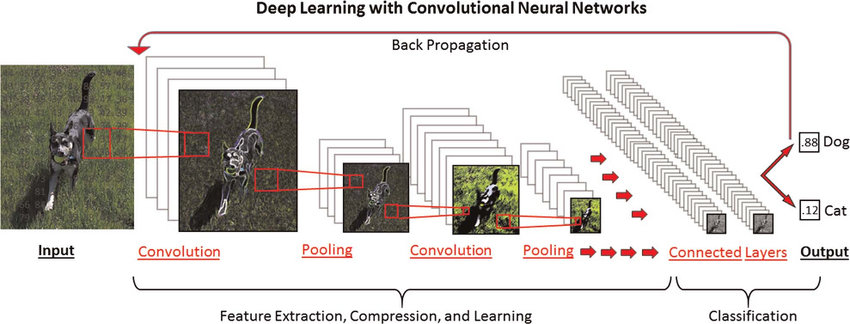

Convolution Neural Network yapısında bir input bulunur.

Input görseli piksellerden oluşan bir matrix'tir.

Pikseller rengine göre 0-1 arasında bir değer alır.

Filtreler (feature detector) convolutional neural network yapısının inputunda dolaşır feature map'i ortaya çıkarır.

Filtrelerdeki weightler convolution neural network'ün öğrendiği yapıdır.

Feature map inputu ifade eden özelliklerin bir araya getirilmesi sonucu oluşan yapıdır.

Oluşan feature map'e convolution layer'da bulunur.

Activation function olarak relu kullanır.

Feature map'in size'ının input ile aynı olması için same padding yöntemi kullanılır.

Same padding yapılarak veri kaybı önlenmiş olur.

Oluşan feature map'e max pooling yöntemiyle down sampling yapılarak boyut küçültülür, pooling layer elde edilir. Böylelikle önemli featurelar seçilmiş olur. 

Pooling layer'da size küçültülerek overfitting önlenir ve modelin hızlı çalışması sağlanır.

Convolution layer ve pooling layer sayısı artırılırsa modelin daha iyi öğrenmesi sağlanmış olur.

Pooling layer'dan sonra dropout yöntemiyle hidden layer ya da input layer'a bir threshold koyulup, bu threshold'un altındaki nodelar kaldırılır. Böylelikle modelin overfitting (datayı aşırı ezberleme) yapmasının önüne geçilmiş olur. 

Fully connected kısmında pooling layer ile elde edilen matrix flatten yapılarak tek bir satır haline getirilerek vektör oluşturulur, boyut düşürülmüş olur.

Fully connected layer'a gelene kadar yapılan işlem feature extraction'dır.

Fully connected layer'da ise classification yapılır.

Flatten yapılan matrix artificial neural network kısmında kullanılacak inputlardır.

Output layer'da binary classification yapılmışsa activation function olarak sigmoid function, multi class classification yapılmışsa softmax function kullanılır.

Model compile edilirken optimizer olarak adaptive momentum (adam) optimizer kullanılır. Adam optimizer'da beta parametreleri bulunur. Bu parametler ile eğer learning rate küçükse Eğer learning rate küçükse ve minimum cost'a ulaşmak uzun sürüyorsa learning rate artırılır. Eğer büyükse de bir sonraki noktaya sürekli zıplayacaktır ve model öğrenemeyecektir, bu yüzden learning rate azaltılır.

Data augmentation yöntemi ile input görsellerinin konumu, yönü, boyutu değiştirilerek training data çoğaltılır. Bu durumda overfitting önlenmiş olur.

CNN'de modelinde öğrenilen iki yapı vardır:

-feature detector

-artifical neural network kısmındaki weight ve bias parametreleridir.

**Fruit 360 Dataset**

Datada 69905 görsel ve 131 meyve bulunur.

In [ ]:
#libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob #kaç classın olduğunu öğrenmek için glob kütüphanesi kullanılır.
import warnings
warnings.filterwarnings('ignore') 

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
train_path = r"C:\Users\ŞEVVAL\Desktop\fruits-360_dataset\fruits-360\Training"
test_path = r"C:\Users\ŞEVVAL\Desktop\fruits-360\Test"

In [ ]:
img = load_img(train_path+"/Apple Braeburn/0_100.jpg")

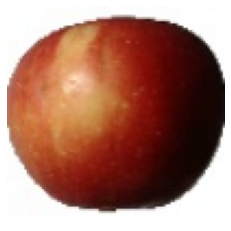

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
x = img_to_array(img) #görsel arraye çevrilir.
x.shape #size'a bakılır.

(100, 100, 3)

100 -> y ekseni

100 -> x ekseni

3 -> renkli bir görsel (rgb)

Convolutional neural network oluşturulurken input görselinin shape'i bilinmelidir.

Aynı zamanda output'un sayısı yani classların sayısı da bilinmelidir.

In [ ]:
className = glob(train_path + "/*")
#glob methoduyla class isimleri bulunur.

In [ ]:
numberOfclass = len(className)
print("Number of class: ",numberOfclass)

Number of class:  131


131 class bulunur.

İnput ve output shape'i bilinmektedir.

Meyve görselleri eğitilecektir.

Amaç 131 farklı meyveyi CNN ile sınıflandırmaktadır.



In [ ]:
#CNN model

model = Sequential() #layerların hepsinin üzerine koyulacağı bir modele ihtiyaç vardır.
                     #Sequential modeliyle layerlar sıralı bir şekilde oluşturulur.
model.add(Conv2D(filters = 32,  kernel_size = (5,5), padding = 'Same', input_shape = x.shape))
#2D layer eklenmesinin sebebi görsel iki boyutlu olduğu içindir.
#filters -> feature detector, 32 tane seçilmiştir.
#filtrelerden feature map elde edileceğinden 32 tane feature map oluşmuş olur.
#kernel_size -> feature detector boyutu 5x5 olarak seçilmiştir.
#same padding yöntemiyle feature map boyutu ile input boyutu aynı olur.
#böylelikle veri kaybı önlenmiş olur.

model.add(Activation("relu"))
#activation function olarak relu seçilmiştir.

model.add(MaxPooling2D(pool_size=(2,2)))
##max pooling yöntemi ile 2x2'lik matrix feature map üzerinde gezdirilir.
#2x2'lik matrix'ten en büyük değer seçilerek boyut indirgeme yapılmış olur, önemli featurelar seçilir.

model.add(Dropout(0.5))
#dropout'taki threshold 0.5 koyulmuştur.
#dropout yöntemiyle input ya da hidden layerdaki bazı nodelar kapatılarak overfitting önlenir.

#bir kere daha convolutional -> pooling -> dropout yapılır.
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#convolutional -> pooling -> dropout
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected

model.add(Flatten())
#flatten yapılarak max pooling sonucu oluşan matrix düzleştirilir.

model.add(Dense(1024)) #hidden layer
#hidden layer 1024 node'dan oluşur.

model.add(Activation("relu"))
#activation function relu seçilmiştir.

model.add(Dropout(0.5))
#1024 node'un yarısı kapatılır.
#her seferinde 512 tanesi aktif olur.

model.add(Dense(numberOfclass)) #output layer

model.add(Activation("softmax"))

In [ ]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy",  metrics=["accuracy"])
#neural network compile edilir.
#model değerlendirilirken accuracy metriği kullanılacaktır.
#binary cross entropy yerine categorical cross entropy kullanılmasının sebebi multi class classification yapılacağı içindir.

In [ ]:
batch_size = 32

In [ ]:
a = glob(train_path + "/*")

In [ ]:
len(a)

131

Her bir class için 320 sample neural network yapısı için yeterli değildir.

Bunun için data augmentation yapılarak görseller çoğaltılmalıdır.

In [ ]:
# data augmentation
train_datagen = ImageDataGenerator( #kerasta bulunan ImageDataGenerator methoduyla data otomatik olarak büyütülür.
        rescale = 1./255, #Renk farklılarını önlemek için grayscale normalization yapılır.
                          #Normalization ile tüm renkler 0-1 aralığına çekilir.
        shear_range = 0.3, #shearing görüntüyü belli oranda çekme olarak düşünülebilir.
        zoom_range = 0.3,       #Random bir şekilde %30 oranında görüntüleri büyütme
        horizontal_flip=True,   #dikey ayna görüntüsü
            )     

Train edielecek datada kullanılacaktır.

Test edilecek datanın orijinal olması daha önemlidir.

Ancak rescale yapılması lazımdır.

Çünkü data rescale edilmiş şekilde train ediliyorsa, test yapılırken de rescale edilmelidir.

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255 )

In [ ]:
#pip install keras --upgrade

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb", #grayscale yapılmışsa rgb olduğunun bilinmesi lazımdır.
                                                    class_mode="categorical" #birden fazla class vardır. 
                                                    )

Found 67692 images belonging to 131 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory  (test_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb", #grayscale yapılmışsa rgb olduğunun bilinmesi lazımdır.
                                                    class_mode="categorical" #birden fazla class vardır. 
                                                    )

Found 22688 images belonging to 131 classes.


In [ ]:
hist = model.fit_generator(
                    generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 100,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size
                        )

Epoch 1/100
50/50 [==============================] - 8s 99ms/step - loss: 4.9905 - accuracy: 0.0181 - val_loss: 4.6870 - val_accuracy: 0.0175
Epoch 2/100
50/50 [==============================] - 5s 99ms/step - loss: 4.4177 - accuracy: 0.0538 - val_loss: 4.1460 - val_accuracy: 0.0662
Epoch 3/100
50/50 [==============================] - 5s 97ms/step - loss: 3.8302 - accuracy: 0.1075 - val_loss: 3.6124 - val_accuracy: 0.1787
Epoch 4/100
50/50 [==============================] - 5s 98ms/step - loss: 3.2725 - accuracy: 0.1644 - val_loss: 2.9140 - val_accuracy: 0.2625
Epoch 5/100
50/50 [==============================] - 5s 99ms/step - loss: 2.7772 - accuracy: 0.2637 - val_loss: 2.5032 - val_accuracy: 0.3487
Epoch 6/100
50/50 [==============================] - 5s 102ms/step - loss: 2.3851 - accuracy: 0.3431 - val_loss: 2.1293 - val_accuracy: 0.4313
Epoch 7/100
50/50 [==============================] - 5s 96ms/step - loss: 1.9962 - accuracy: 0.4306 - val_loss: 1.8600 - val_accuracy: 0.4775
Epoch

In [ ]:
#model save
model.save_weights("cnn_fruit_hist.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


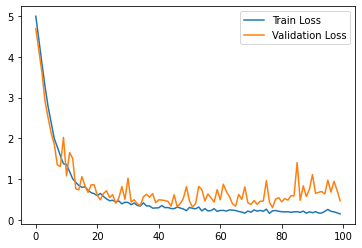

In [ ]:
#model evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


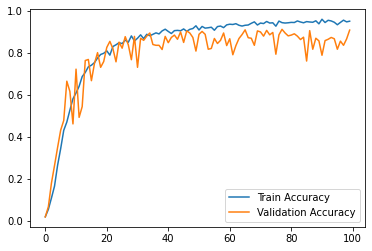

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
#save history
import json
with open("cnn_fruit_hist.json","w") as f:
    json.dump(hist.history,f)